In [55]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [56]:
data = pd.read_csv('final.csv',index_col=0)

In [4]:
data.drop(columns=['Year',"MSP",'exported','Production','rain','Combined','Month'],inplace=True)

In [5]:
data = data.to_numpy()

In [6]:
train_size = int(data.shape[0]*0.67)
train_size

128

In [7]:
test_size = data.shape[0]-train_size
test_size

64

In [8]:
train = data[0:train_size]
test = data[train_size:]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [11]:
def createDataset(Data,window):
    dataX, dataY = [],[]
    for i in range(Data.shape[0]-window):
        dataX.append(Data[i:i+window,0])
        dataY.append(Data[i+window,0])
    return np.array(dataX), np.array(dataY)

In [12]:
window=12
testX,testY = createDataset(test,window)
trainX, trainY = createDataset(train,window)

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, GRU, Lambda,LSTM
from keras import regularizers
from keras.optimizers import Adam
import tensorflow as tf

Using TensorFlow backend.


In [46]:
number_of_features =1
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],number_of_features))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],number_of_features))
trainX.shape

(116, 12, 1)

In [52]:
model = Sequential()
model.add(LSTM(units=3,batch_input_shape=(1,window,number_of_features),input_shape=(window,number_of_features),kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l2(0.01),dropout=0.1,stateful=True))
model.add(Dense(1,activation=None))
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.015))
model.fit(trainX,trainY,batch_size=1,epochs=50)

Epoch 1/50
116/116 [==============================] - 1s 12ms/step - loss: 0.0468
Epoch 2/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0404
Epoch 3/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0328
Epoch 4/50
116/116 [==============================] - 1s 7ms/step - loss: 0.0338
Epoch 5/50
116/116 [==============================] - 1s 6ms/step - loss: 0.0325
Epoch 6/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0360A: 0s - loss: 0.
Epoch 7/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0325
Epoch 8/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0359
Epoch 9/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0357
Epoch 10/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0384
Epoch 11/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0352
Epoch 12/50
116/116 [==============================] - 1s 5ms/step - loss: 0.0306
Epoch 13

In [53]:
testPredict = model.predict(testX,batch_size=1)
testPredict = scaler.inverse_transform(testPredict).ravel()
trainPredict = model.predict(trainX,batch_size=1)
trainPredict = scaler.inverse_transform(trainPredict).ravel()
testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

In [54]:
from sklearn.metrics import mean_absolute_error
print('train accuracy',mean_absolute_error(trainTrue,trainPredict))
print('test accuracy',mean_absolute_error(testTrue,testPredict))

train accuracy 90.11687254487107
test accuracy 229.8357788607605


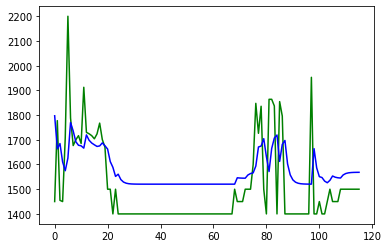

In [50]:
from matplotlib import pyplot as plt
plt.plot(trainTrue,c='g')
plt.plot(trainPredict,c='b')
plt.show()

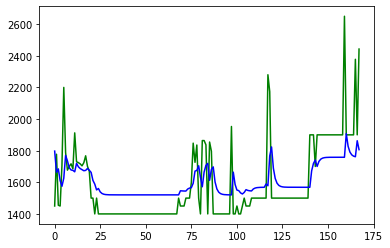

In [51]:
combinedPredict = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPredict, c='b')
plt.show()